In [10]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_data=np.array(train_df,dtype='float32')
test_data=np.array(test_df,dtype='float32')
x_train=train_data[:,1:]/255
y_train=train_data[:,0]
x_test=test_data[:,1:]/255
y_test=test_data[:,0]

In [4]:
x_train,x_validate,y_train,y_validate=train_test_split(x_train,y_train,test_size=0.2,random_state=12345)

<function matplotlib.pyplot.show(close=None, block=None)>

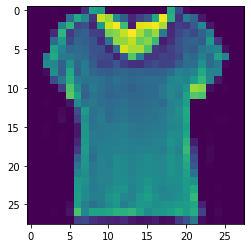

In [5]:
image=x_train[100,:].reshape((28,28))
plt.imshow(image)
plt.show

In [96]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [97]:
cnn_model = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [98]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [99]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
)

Epoch 1/10
94/94 [==============================] - 61s 643ms/step - loss: 1.4564 - accuracy: 0.4789 - val_loss: 0.6006 - val_accuracy: 0.7784
Epoch 2/10
94/94 [==============================] - 60s 635ms/step - loss: 0.5790 - accuracy: 0.7837 - val_loss: 0.5168 - val_accuracy: 0.8098
Epoch 3/10
94/94 [==============================] - 62s 661ms/step - loss: 0.4966 - accuracy: 0.8185 - val_loss: 0.4568 - val_accuracy: 0.8325
Epoch 4/10
94/94 [==============================] - 61s 653ms/step - loss: 0.4454 - accuracy: 0.8381 - val_loss: 0.4119 - val_accuracy: 0.8549
Epoch 5/10
94/94 [==============================] - 63s 669ms/step - loss: 0.4096 - accuracy: 0.8531 - val_loss: 0.3904 - val_accuracy: 0.8608
Epoch 6/10
94/94 [==============================] - 63s 666ms/step - loss: 0.4011 - accuracy: 0.8567 - val_loss: 0.3724 - val_accuracy: 0.8693
Epoch 7/10
94/94 [==============================] - 65s 691ms/step - loss: 0.3750 - accuracy: 0.8670 - val_loss: 0.3589 - val_accuracy: 0.8716

In [100]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.3295
 test acc: 0.8819


In [101]:
predictions= cnn_model.predict([x_test])

In [102]:
print(predictions)

[[9.0309274e-01 1.5103033e-07 2.7058268e-04 ... 5.5791977e-10
  1.0799119e-05 2.2007247e-11]
 [6.9390751e-07 9.9997914e-01 5.3596631e-07 ... 1.3406640e-08
  4.3600562e-07 1.3797214e-09]
 [2.0954488e-02 8.4963594e-06 3.8595730e-01 ... 1.3304650e-07
  2.4343650e-05 3.6845205e-07]
 ...
 [7.2620075e-08 5.5035045e-08 4.4165616e-05 ... 2.6168609e-05
  9.9983037e-01 4.6505690e-07]
 [1.3070912e-02 9.3276722e-05 9.3209194e-03 ... 1.2492320e-06
  9.1556472e-01 9.5572486e-06]
 [3.8794170e-03 5.1897985e-01 6.2699266e-02 ... 2.4595212e-07
  2.6861739e-03 5.8090308e-08]]


In [103]:
print(np.argmax(predictions[344])) 

9


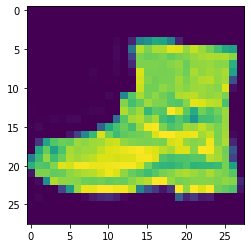

In [104]:
plt.imshow(x_test[344])

In [105]:
import cv2

In [118]:
img=cv2.imread('trouser.jpg')

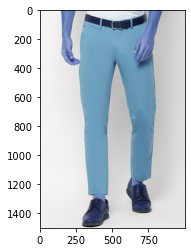

In [119]:
plt.imshow(img)

In [120]:
img.shape

(1500, 1000, 3)

In [121]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [122]:
gray.shape

(1500, 1000)

In [123]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [124]:
resized.shape

(28, 28)

In [125]:
newimg = tf.keras.utils.normalize (resized,axis = 1)

In [126]:
newimg= np.array(newimg).reshape(-1,28,28,1)

In [127]:
newimg.shape

(1, 28, 28, 1)

In [128]:
predictions= cnn_model.predict([newimg])

In [129]:
print(np.argmax(predictions))

2
